# Handwritten Digit Classification


For this Hands-on, we will use the popular scikit-learn library to build a basic classifier. The MNIST dataset contains images of handwritten digits, and the task is to classify each image into its corresponding digit (0 to 9).

## Import Libraries

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

## Load the Dataset

**Question 1:** Load the train and test subsets of the mnist dataset from Keras

In [3]:
import tensorflow as tf

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()



11490434/11490434 [==============================] - 0s 0us/step


## Data Pre-Processing

**Question 2:**  

*   Adjust the input shape to match the one the model is expecting
*   Normalize the values of the pixels
*   Turn labels into categories using the to_categorical function

In [4]:
# Preprocess the data

X_train= X_train.reshape(-1,28,28,1) / 255.0
X_test= X_test.reshape(-1,28,28,1) / 255.0
X_train, X_test = np.array(X_train), np.array(X_test)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

## Build and train a CNN

**Question 3:** Create a Convolutional neural Network of your choice and be carefyl while you select the following:


*   input shape
*   activation function at the output layer
*   number of output neurons



In [5]:

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


**Question 4:** Compile and train the model. Choose an appropriate loss function, optimizer, and print out the accuracy of the model.

In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)



Epoch 1/10
750/750 [==============================] - 53s 69ms/step - loss: 0.1864 - accuracy: 0.9452 - val_loss: 0.0573 - val_accuracy: 0.9825
Epoch 2/10
750/750 [==============================] - 53s 70ms/step - loss: 0.0509 - accuracy: 0.9846 - val_loss: 0.0480 - val_accuracy: 0.9854
Epoch 3/10
750/750 [==============================] - 37s 49ms/step - loss: 0.0352 - accuracy: 0.9889 - val_loss: 0.0458 - val_accuracy: 0.9862
Epoch 4/10
750/750 [==============================] - 35s 47ms/step - loss: 0.0264 - accuracy: 0.9918 - val_loss: 0.0423 - val_accuracy: 0.9886
Epoch 5/10
750/750 [==============================] - 35s 47ms/step - loss: 0.0200 - accuracy: 0.9942 - val_loss: 0.0457 - val_accuracy: 0.9866
Epoch 6/10
750/750 [==============================] - 38s 50ms/step - loss: 0.0162 - accuracy: 0.9950 - val_loss: 0.0396 - val_accuracy: 0.9885
Epoch 7/10
750/750 [==============================] - 36s 48ms/step - loss: 0.0132 - accuracy: 0.9962 - val_loss: 0.0376 - val_accuracy:

## Evaluate the Model's performance

**Question 5:** Plot the training and validation accuracy to better understand the performance of the model.

313/313 [==============================] - 2s 7ms/step - loss: 0.0374 - accuracy: 0.9900
Test Accuracy: 0.9900000095367432


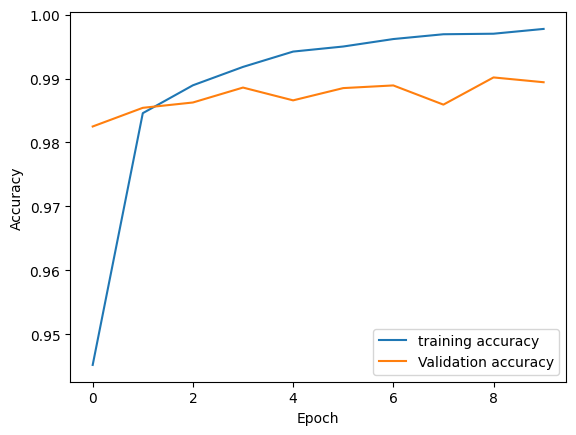

In [8]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Plot the training and validation accuracy over epochs
plt.plot(history.history["accuracy"], label= "training accuracy")
plt.plot(history.history["val_accuracy"], label= "Validation accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
